In [4]:
%run ../../utils/commonImports.py
%matplotlib inline

In [5]:
data_root = "D:\\Dropbox\\My work\\krypl-project\\dataSplit\\03-candle-shape-sg"
gs_path = "D:\\Dropbox\\My work\\krypl-project\\models\\03-candle-shape-sg\\tree_search.pkl"

# Grid search evaluation

C:\Anaconda3\envs\crypto36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


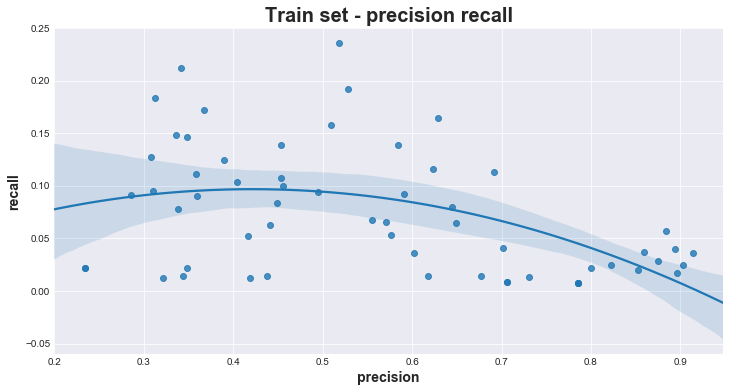

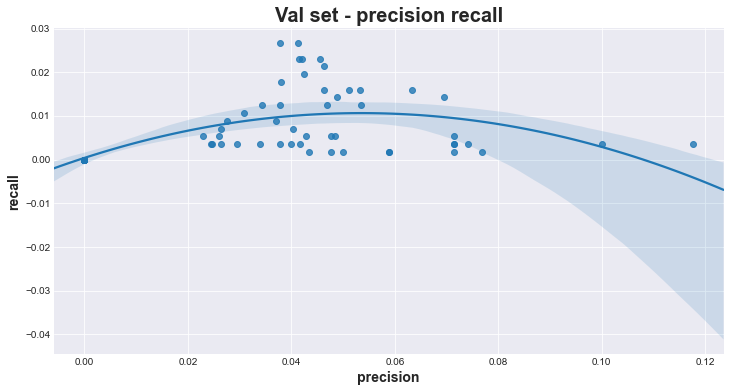

In [6]:
from utils.evaluation import gs_report

grid_search, stats_val = gs_report(data_root, gs_path)

# Model selection

In [7]:
import pandas as pd

class ThresholdModel:
    def __init__(self, clf, threshold_1=0.5):
        self.clf = clf
        self.threshold_1 = threshold_1
        
    def predict(self, X):
        probabs = pd.Series(self.clf.predict_proba(X)[:, 1])
        labels = probabs > self.threshold_1
        return labels.apply(int)

In [8]:
stats_val.sort_values('precision', ascending=False).head(10)

,precision,recall,f1
3,0.1176,0.0036,0.0069
21,0.1000,0.0036,0.0069
1,0.0769,0.0018,0.0035
16,0.0741,0.0036,0.0068
4,0.0714,0.0053,0.0099
26,0.0714,0.0018,0.0035
8,0.0714,0.0036,0.0068
13,0.0714,0.0036,0.0068
18,0.0696,0.0142,0.0236
19,0.0634,0.0160,0.0256


In [9]:
from utils.evaluation import clf_report

clf = grid_search.clfs[3]
# threshold_model = ThresholdModel(clf, 0.6)
# clf = threshold_model
clf_report(clf, data_root)

## Train data

,predicted_0,predicted_1
true_0,67800,10
true_1,1458,21


Precision: 0.677
Recall: 0.014



## Validation data

,predicted_0,predicted_1
true_0,29119,15
true_1,560,2


Precision: 0.118
Recall: 0.004



## Test data

,predicted_0,predicted_1
true_0,41512,25
true_1,885,1


Precision: 0.038
Recall: 0.001



In [10]:
clf.class_weight

{0: 1, 1: 4}